In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0 

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation = 'softmax')(x)
model = Model(i,x)
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
r = model.fit(
    x_train, y_train, validation_data = (x_test, y_test), epochs =10
)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3288 - accuracy: 0.8956 - val_loss: 0.1155 - val_accuracy: 0.9652
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1064 - accuracy: 0.9677 - val_loss: 0.1131 - val_accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.0786 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0540 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0516 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0523 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0496 -

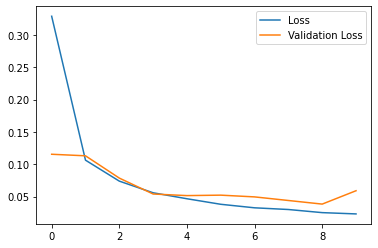

In [6]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

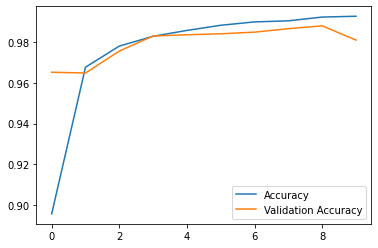

In [9]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize = False, title= 'Confusion Matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalize Confussion Matrix')
  else:
    print('Unnormalize Confussion Matrix')
  print(cm)
  
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] >thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Unnormalize Confussion Matrix
[[ 974    1    2    0    2    0    1    0    0    0]
 [   0 1132    1    0    0    1    1    0    0    0]
 [   2    4 1024    0    0    0    0    1    1    0]
 [   0    0    2 1001    0    3    0    2    2    0]
 [   0    1    0    0  964    0    4    0    2   11]
 [   2    1    1    8    0  872    6    1    1    0]
 [   6    3    0    0    5    1  943    0    0    0]
 [   0   21   12    2    2    0    0  970    1   20]
 [   1    2    7    2    1    4    9    3  944    1]
 [   3    3    0    1    7    0    0    3    6  986]]


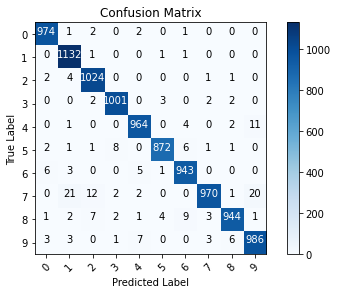

In [12]:
pred = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, list(range(10)))